In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# I import the file with data

flights = pd.read_csv("BOS_CUN_trips1M.csv",)

flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1


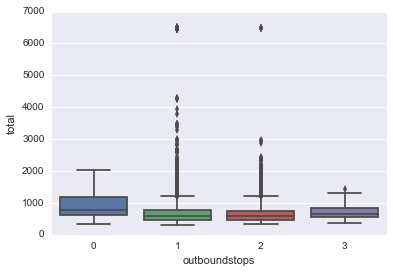

In [3]:
# I now want to do a bloxplot for each combination of outbound stops and returnstops

sns.boxplot(flights['outboundstops'], flights['total'])

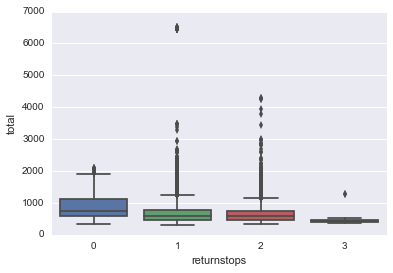

In [4]:
# I now want to do a bloxplot for each combination of outbound stops and returnstops

sns.boxplot(flights['returnstops'], flights['total'])

In [5]:
# I want to group by both the number of outbound stops and return stops. I then find mean prices.

groupedflights = flights.groupby(['outboundstops', 'returnstops']).mean()

groupedflights = pd.DataFrame(groupedflights['total'])

groupedflights
# Again, I'm only interested in the 'total' column.

total
outboundstops returnstops            
0             0            956.847618
              1            826.761802
              2            775.938667
1             0            781.470335
              1            651.233799
              2            638.635024
              3            489.361429
2             0            758.911642
              1            635.264192
              2            611.120183
              3            470.450000
3             0            768.576612
              1            726.988780
              2            647.720327

In [9]:
# I want to pivot this table. First I need to do export-import

groupedflights.to_csv("number_of_stopovers.csv")

number_of_stopovers = pd.read_csv("number_of_stopovers.csv")

number_of_stopoverspiv = number_of_stopovers.pivot("outboundstops", "returnstops", "total")

number_of_stopoverspiv

returnstops,0,1,2,3
outboundstops,,,,
0,956.847618,826.761802,775.938667,NaN
1,781.470335,651.233799,638.635024,489.361429
2,758.911642,635.264192,611.120183,470.450000
3,768.576612,726.988780,647.720327,NaN


In [10]:
# I also want to export this table now.

number_of_stopoverspiv.to_csv("numberofstopovers_pivot.csv")

In [ ]:
# We can see that on average, a trip with both no outbound stops and no return stops is the most expensive.
# This is not surprising
# We can also see that the cheapest flight combination is with two out bounds tops and 3 return stops.